# Отчет по исследованию данных о совершенных внутренних авиарейсах из аэропортов Нью-Йорка в 2013 году

*Выполнила студентка 127мб группы физического факультета Хмелева Мария*

**Задача:** Исследовать статистику задержек авиарейсов на основе датасета, содержащего информацию о совершенных внутренних авиарейсов из аэропортов Нью-Йорка в 2013 году. 

Загрузим используемый датасет:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('flights_NY.csv')

In [3]:
data.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


**Описание датасета:**
* **year**, **month**, **day**: date of departure;
* **dep_time**, **arr_time**: actual departure and arrival times (format HHMM or HMM), local timezone;
* **dep_delay**, **arr_delay**: departure and arrival delays, in minutes. Negative times represent early departures/arrivals;
* **carrier**: two letter carrier abbreviation;
* **flight**: flight number;
* **tailnum**: plane tail number;
* **origin**, **dest**: origin and destination airports;
* **air_time:** amount of time spent in the air, in minutes;
* **distance**: distance between origin and destination airports.

Аббревиатуры аэропортов Нью-Йорка:
* JFK – John F. Kennedy International Airport;
* LGA – LaGuardia Airport;
* EWR – Newark International Airport.


### 1. Пропущенные значения в датасете

Найдем пропущенные значения в колонках:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 36.0+ MB


In [5]:
data.shape

(336776, 14)

In [6]:
data = data.replace('None', np.nan)

In [7]:
data.isnull().sum()

year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
dtype: int64

Таким образом, пропущенные значения есть в колонкаx: dep_time, dep_delay, arr_time, arr_delay, tailnum и air_time.

Подсчитаем количсетво строк, в которых есть хотя бы одно пропущенное значение:

In [8]:
data.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
336771    6
336772    6
336773    5
336774    5
336775    5
Length: 336776, dtype: int64

In [9]:
data.shape[0]-data.dropna().shape[0]

9430

Получилось, что всего есть 9430 строчек, в которых пропущено хотя бы одно значение.

Посмотрим, есть ли особенности в строчках, в которых есть хотя бы одно пропущенное значение:

In [10]:
missing_labels = list(set(data.index) - set(data.dropna().index))

In [11]:
missing_labels = sorted(missing_labels)

In [12]:
data_nan = data.iloc[missing_labels,:]

In [13]:
data_nan

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
471,2013,1,1,1525.0,-5.0,1934.0,NaN,MQ,N719MQ,4525,LGA,XNA,NaN,1147
477,2013,1,1,1528.0,29.0,2002.0,NaN,EV,N17108,3806,EWR,STL,NaN,872
615,2013,1,1,1740.0,-5.0,2158.0,NaN,MQ,N739MQ,4413,LGA,XNA,NaN,1147
643,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425
725,2013,1,1,1939.0,59.0,29.0,NaN,9E,N905XJ,3325,JFK,DFW,NaN,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


In [14]:
data_nan['arr_delay'].unique()

array([nan])

In [15]:
data_nan['air_time'].unique()

array([nan])

Можно заметить, что в рейсах с пропущенными значениями
есть некоторая особенность: для всех этих рейсов пропущены значения в категориях arr_delay и air_time.

Удалим из исходной таблицы те строки, в которых есть хотя бы одно пропущенное значение:

In [16]:
data = data.dropna()

In [17]:
data.shape

(327346, 14)

### 2. Гистограммы времени задержки вылета и прилета

Построим в одних осях нормированные гистограммы времени задержки вылета и прилета:

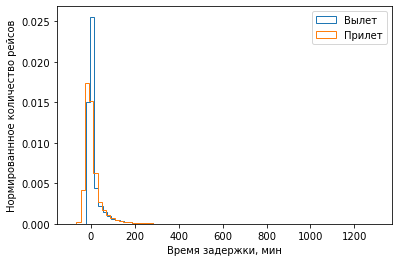

In [18]:
plt.hist(data['dep_delay'],density=True,bins=70,label='Вылет',histtype='step')
plt.hist(data['arr_delay'],density=True,bins=70,label='Прилет',histtype='step')
plt.xlabel("Время задержки, мин")
plt.ylabel("Нормированнное количество рейсов")
plt.legend()

Судя по гистограмме, данные в основном лежат в диапазоне до 200 мин, но есть выбросы с большим временем задержки. Посчитаем, сколько есть выбросов в определенных диапазонах значений:

In [19]:
print("Количество выбросов для времени задержки вылетов в диапазонах:")

counter=0
for x in data['dep_delay']:
    if x>=1200:
        counter+=1
print("После 1200 мин: ", counter)

counter=0
for x in data['dep_delay']:
    if 1000<=x<1200:
        counter+=1
print("От 1000 до 1200 мин: ", counter)

counter=0
for x in data['dep_delay']:
    if 800<=x<1000:
        counter+=1
print("От 800 до 1000 мин: ",counter)

counter=0
for x in data['dep_delay']:
    if 600<=x<800:
        counter+=1
print("От 600 до 800 мин: ",counter)

counter=0
for x in data['dep_delay']:
    if 400<=x<600:
        counter+=1
print("От 400 до 600 мин: ",counter)

counter=0
for x in data['dep_delay']:
    if 200<=x<400:
        counter+=1
print("От 200 до 400 мин: ",counter)

counter=0
for x in data['dep_delay']:
    if 150<=x<200:
        counter+=1
print("От 150 до 200 мин: ",counter)

counter=0
for x in data['dep_delay']:
    if 100<=x<150:
        counter+=1
print("От 100 до 150 мин: ",counter)


counter=0
for x in data['arr_delay']:
    if x<= -60:
        counter+=1
print("До -20 мин: ",counter)

Количество выбросов для времени задержки вылетов в диапазонах:
После 1200 мин:  1
От 1000 до 1200 мин:  4
От 800 до 1000 мин:  15
От 600 до 800 мин:  19
От 400 до 600 мин:  93
От 200 до 400 мин:  2727
От 150 до 200 мин:  3332
От 100 до 150 мин:  7219
До -20 мин:  240


In [20]:
print("Количество выбросов для времени задержки прилетов в диапазонах:")

counter=0
for x in data['arr_delay']:
    if x>=1200:
        counter+=1
print("После 1200 мин: ", counter)

counter=0
for x in data['arr_delay']:
    if 1000<=x<1200:
        counter+=1
print("От 1000 до 1200 мин: ", counter)

counter=0
for x in data['arr_delay']:
    if 800<=x<1000:
        counter+=1
print("От 800 до 1000 мин: ",counter)

counter=0
for x in data['arr_delay']:
    if 600<=x<800:
        counter+=1
print("От 600 до 800 мин: ",counter)

counter=0
for x in data['arr_delay']:
    if 400<=x<600:
        counter+=1
print("От 400 до 600 мин: ",counter)

counter=0
for x in data['arr_delay']:
    if 300<=x<400:
        counter+=1
print("От 300 до 400 мин: ",counter)

counter=0
for x in data['arr_delay']:
    if 200<=x<300:
        counter+=1
print("От 200 до 300 мин: ",counter)

counter=0
for x in data['arr_delay']:
    if 150<=x<200:
        counter+=1
print("От 150 до 200 мин: ",counter)

counter=0
for x in data['arr_delay']:
    if 100<=x<150:
        counter+=1
print("От 100 до 150 мин: ",counter)

counter=0
for x in data['arr_delay']:
    if x<= -60:
        counter+=1
print("До -60 мин: ",counter)

Количество выбросов для времени задержки прилетов в диапазонах:
После 1200 мин:  1
От 1000 до 1200 мин:  3
От 800 до 1000 мин:  15
От 600 до 800 мин:  20
От 400 до 600 мин:  90
От 300 до 400 мин:  497
От 200 до 300 мин:  2206
От 150 до 200 мин:  3433
От 100 до 150 мин:  7894
До -60 мин:  240


На основании полученных значений ограничим диапазон построения гистограмм:

In [21]:
dep_delay = (data['dep_delay']<100)&(data['dep_delay']>-20)
arr_delay = (data['arr_delay']<100)&(data['arr_delay']>-60)

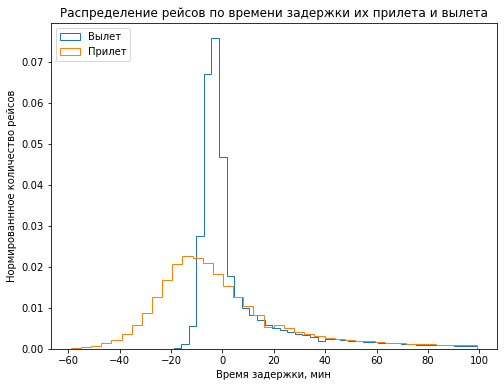

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(data[dep_delay]['dep_delay'],density=True,bins=40,label='Вылет',histtype='step')
plt.hist(data[arr_delay]['arr_delay'],density=True,bins=40,label='Прилет',histtype='step')
plt.xlabel("Время задержки, мин")
plt.ylabel("Нормированнное количество рейсов")
plt.title("Распределение рейсов по времени задержки их прилета и вылета")
plt.legend()

На основании полученных гистограмм видно, что они имеют не симметричный вид с большим правым хвостом. 
Чтобы убедиться в этом, построим QQ-plot для времен задержек вылета и прилета с помощью функции `scipy.stats.probplot`:

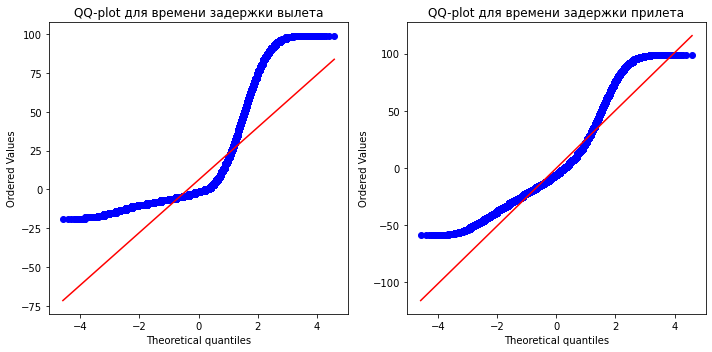

In [23]:
plt.figure(figsize=(10,5))
ax = plt.gca()

ax = plt.subplot(1,2,1)
stats.probplot(data[dep_delay]['dep_delay'],plot=ax)
plt.title('QQ-plot для времени задержки вылета')

ax = plt.subplot(1,2,2)
stats.probplot(data[arr_delay]['arr_delay'],plot=ax)
plt.title('QQ-plot для времени задержки прилета')

plt.tight_layout()

Видно, что исследуемые данные не являются нормально распределенными.

### 3. Статистические характеристики времени задержки вылета и прилета

Оценим среднее значение, медиану и величину стандартного отклонения для времени задержки вылета и времени задержки прилета. Для оценки использовались данные без выбросов.

In [24]:
pd.DataFrame({"dep_delay":data[dep_delay]['dep_delay'].describe(),
              "arr_delay":data[arr_delay]['arr_delay'].describe()})

,dep_delay,arr_delay
count,313858.000000,312947.000000
mean,6.054639,-0.117033
std,20.424939,26.449126
min,-19.000000,-59.000000
25%,-5.000000,-17.000000
50%,-2.000000,-6.000000
75%,7.000000,10.000000
max,99.000000,99.000000


Можно заметить, что:
* средняя задержка вылета больше, чем прилета;
* медианное значение прилета и вылета отрицательные, то есть рейсы в основном прилетают/улетают раньше срока;
* средние значения не совпадают с медианным, как раз таки на гистограммах был длинный "правый хвост" с большими положительными временами задержек;
* достаточно большие ошибки определения времен задержек.

### 4. Средняя задержка вылета для каждой авиакомпании

Посмотрим, какие вообще есть авиакомпании в исследуемом датасете:

In [25]:
data['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

Разобьем данные задержек вылета по всем авиакомпаниям и расчитаем среднее значение задержки вылета для каждой из них:

In [26]:
print('Средние времена задержки вылета для каждой авиакомпании:')

for x in data['carrier'].unique():
    globals()['dep_delay%s' % x] = data[(data['carrier']==x) & dep_delay]['dep_delay']
    if np.mean(globals()['dep_delay%s' % x]) >= np.mean(dep_delay):
        print(x,':', np.mean(globals()['dep_delay%s' % x]), ', больше средней задержки по всей выборке')
    else:
        print(x,':', np.mean(globals()['dep_delay%s' % x]), ', меньше средней задержки по всей выборке')

Средние времена задержки вылета для каждой авиакомпании:
UA : 6.850878448491788 , больше средней задержки по всей выборке
AA : 3.3806614295412665 , больше средней задержки по всей выборке
B6 : 6.5904529899657796 , больше средней задержки по всей выборке
DL : 3.818818948734588 , больше средней задержки по всей выборке
EV : 9.90900889560255 , больше средней задержки по всей выборке
MQ : 5.0072487780631265 , больше средней задержки по всей выборке
US : 0.9950766705984923 , больше средней задержки по всей выборке
WN : 9.634095271331356 , больше средней задержки по всей выборке
VX : 4.801514221403724 , больше средней задержки по всей выборке
FL : 7.888182122530967 , больше средней задержки по всей выборке
AS : 1.5947521865889214 , больше средней задержки по всей выборке
9E : 7.042490301126917 , больше средней задержки по всей выборке
F9 : 8.9703125 , больше средней задержки по всей выборке
HA : -1.7664670658682635 , меньше средней задержки по всей выборке
YV : 9.09197651663405 , больше сред

Для каждой авиакомпании оценим 95% доверительный интервал для выборочного среднего с учетом неизвестной дисперии при большой выборке (n>30) с помощью функции `stats.norm.interval` из библиотеки `scipy.stats`:

In [27]:
print('95%-доверительные интервалы времени задержки вылета для каждой авиакомпании:')

for x in data['carrier'].unique():
    dov_interval = stats.norm.interval(alpha=0.95,loc=np.mean(globals()['dep_delay%s' % x]),
                                       scale=stats.sem(globals()['dep_delay%s' % x]))
    print(f'{x}: ({dov_interval[0]:.2f}, {dov_interval[1]:.2f})')

95%-доверительные интервалы времени задержки вылета для каждой авиакомпании:
UA: (6.69, 7.01)
AA: (3.18, 3.59)
B6: (6.41, 6.77)
DL: (3.66, 3.98)
EV: (9.69, 10.13)
MQ: (4.73, 5.28)
US: (0.76, 1.23)
WN: (9.27, 10.00)
VX: (4.32, 5.28)
FL: (7.14, 8.63)
AS: (0.27, 2.92)
9E: (6.70, 7.39)
F9: (7.28, 10.66)
HA: (-3.00, -0.53)
YV: (6.79, 11.40)
OO: (-6.22, 12.15)


Визуализируем средние значения задержки вылета и доверительный интервал для каждой авиакомпании на графике:

Text(0.5, 1.0, 'Средние значения и 95%-доверительные интервалы\n для времени задержек вылета рейсов для каждой авиакомпании.')

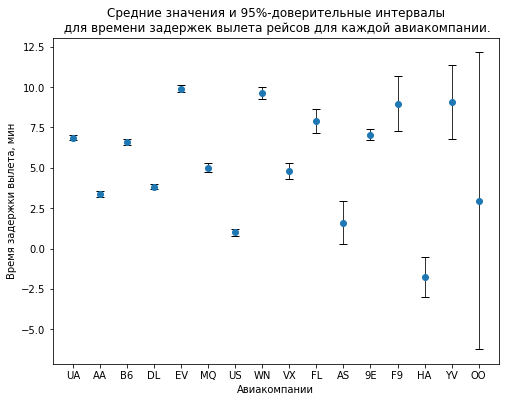

In [28]:
x = []
y = []
yerr = []
med = []

for i in data['carrier'].unique():
    means = np.mean(globals()['dep_delay%s' % i])
    dov_interval = stats.norm.interval(alpha=0.95,loc=np.mean(globals()['dep_delay%s' % i]),
                                       scale=stats.sem(globals()['dep_delay%s' % i]))
    yerrs = (dov_interval[1]-dov_interval[0])/2
    x.append(i)
    y.append(means)
    yerr.append(yerrs)   

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=yerr, marker='o', linestyle='none',
             ecolor='k', elinewidth=0.8, capsize=4, capthick=1)
plt.xlabel('Авиакомпании')
plt.ylabel('Время задержки вылета, мин')
plt.title('Средние значения и 95%-доверительные интервалы\n для времени задержек вылета рейсов для каждой авиакомпании.')

Можно заметить, что для авиакомпании "ОО" доверительный интервал получился самый большой, предположительно из-за большого разброса данных и большого значения стандартоного выборочного отклонения.

### 5. Проверка гипотезы о равенстве средних времен задержки для авиакомпаний American Airlines и Delta Airlines

Проверим, является ли значимым различие в среднем  времени задержки вылета для авиакомпаний American Airlines (AA) и Delta Airlines (DL).

Для этого вначале посмотрим на распределение времен задержек вылета для этих авиакомпаний и проверим их на нормальность  с помощью построения QQ-plot:

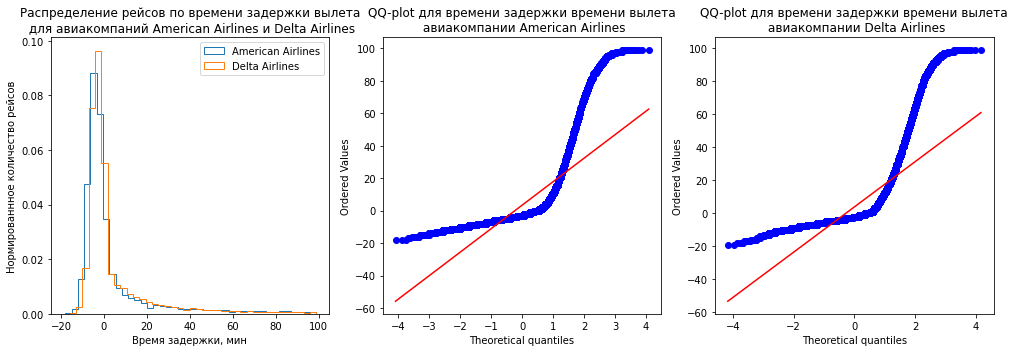

In [29]:
plt.figure(figsize=(14, 5))

plt.subplot(1,3,1)
plt.hist(data[(data['carrier']=='AA')& dep_delay]['dep_delay'],density=True,bins=40,
         label='American Airlines',histtype='step')
plt.hist(data[(data['carrier']=='DL')& dep_delay]['dep_delay'],density=True,bins=40,
         label='Delta Airlines',histtype='step')
plt.xlabel("Время задержки, мин")
plt.ylabel("Нормированнное количество рейсов")
plt.title("Распределение рейсов по времени задержки вылета\n для авиакомпаний American Airlines и Delta Airlines")
plt.legend()

ax = plt.gca()

ax = plt.subplot(1,3,2)
stats.probplot(data[(data['carrier']=='AA')& dep_delay]['dep_delay'],plot=ax)
plt.title('QQ-plot для времени задержки времени вылета\n авиакомпании American Airlines')

ax = plt.subplot(1,3,3)
stats.probplot(data[(data['carrier']=='DL')& dep_delay]['dep_delay'],plot=ax)
plt.title('QQ-plot для времени задержки времени вылета\n авиакомпании Delta Airlines')

plt.tight_layout()

По полученным графикам можно сделать вывод, что распределения времен задержек для авиакомпаний AA и DL также не является нормальным, есть отклонение от симметрии.

Несмотря на ассиметричность данных попробуем использовать двувыборочный критерий Стьюдента для несвязных выборок для проверки гипотезы о равенстве средних двух выборок.

Сформулируем гипотезы:<br>
$H_0: \mu_1 = \mu_2$<br>
$H_1: \mu_1 \ne \mu_2$<br>

Для несвязных выборок используем функцию `scipy.stats.ttest_ind`.

Для использования этого критерия необходимо будет проверить, равны ли дисперсии у двух выборок.<br>
Это можно проверить с помощью критерия Левене [`scipy.stats.levene`], который проверяет гипотезу о равенстве дисперсий двух выборок:<br>
$H_0: \sigma_1 = \sigma_2$<br>
$H_1:\sigma_1 \neq \sigma_2$<br>

In [30]:
dep_delay_AA = data[(data['carrier']=='AA')& dep_delay]['dep_delay']
dep_delay_DL = data[(data['carrier']=='DL')& dep_delay]['dep_delay']

In [31]:
stats.levene(dep_delay_AA,dep_delay_DL)

LeveneResult(statistic=17.235922808824938, pvalue=3.304886228086167e-05)

Судя по тесту, p-value << 0.01, то есть мы отвергаем нулевую гипотезу о равенстве дисперсих в этих выборках по уровню значимости 0.01 и считаем, что дисперсии в выборках не равны.

Теперь применим двухвыборочный критерий Стьюдента для несвязных выборок:

In [32]:
stats.ttest_ind(dep_delay_AA,dep_delay_DL,equal_var=False)

Ttest_indResult(statistic=-3.318629444776977, pvalue=0.0009051112033196085)

$p-value = 0.0009 < 0.001$

Судя по значению p-value мы можем отвергунть гипотезу о равенстве средних времен задержи вылета для авиакомпаний АА и DL по уровню значимости $\alpha=0.001\$. Следовательно различие в среднем времени задержки для этих авиакомпаний является значимым.

### 6. Cравнение аэропортов вылета с точки зрения статистики задержек вылетов

Сравним между собой аэропорты вылета с точки зрения статистики задержек вылетов и выясним, являются ли эти различия статистически значимыми.

Посмотрим, какие аэропорты вылета есть в датасете:

In [33]:
data['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [34]:
dep_delay_EWR = data[(data['origin']=='EWR')& dep_delay]['dep_delay']
dep_delay_LGA = data[(data['origin']=='LGA')& dep_delay]['dep_delay']
dep_delay_JFK = data[(data['origin']=='JFK')& dep_delay]['dep_delay']

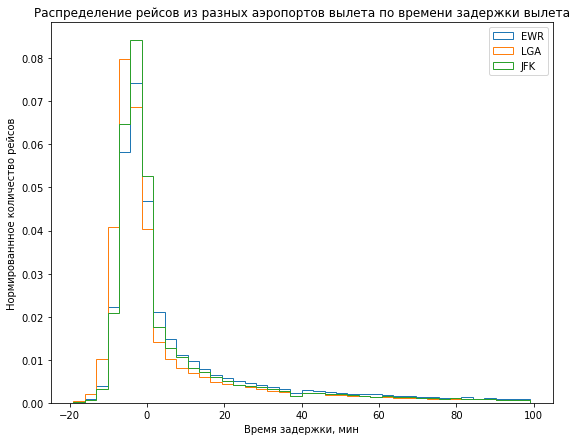

In [35]:
plt.figure(figsize=(9, 7))
plt.hist(dep_delay_EWR,density=True,bins=40,label='EWR',histtype='step')
plt.hist(dep_delay_LGA,density=True,bins=40,label='LGA',histtype='step')
plt.hist(dep_delay_JFK,density=True,bins=40,label='JFK',histtype='step')
plt.xlabel("Время задержки, мин")
plt.ylabel("Нормированнное количество рейсов")
plt.title("Распределение рейсов из разных аэропортов вылета по времени задержки вылета")
plt.legend()

Проверим, равны ли средние значения подвыборок для каждой пары аэропортов. Для этого будем использовать двухвыборочный критерий Стьюдента для несвязных выборок и критерий Левене для проверки равенства дисперсий (как в прошлом пункте).

In [36]:
stats.levene(dep_delay_EWR,dep_delay_JFK)

LeveneResult(statistic=480.99649209220615, pvalue=1.6952613346450063e-106)

In [37]:
stats.ttest_ind(dep_delay_EWR,dep_delay_JFK,equal_var=False)

Ttest_indResult(statistic=21.356534929534828, pvalue=4.314467847326151e-101)

In [38]:
stats.levene(dep_delay_EWR,dep_delay_LGA)

LeveneResult(statistic=613.9984494797176, pvalue=2.3723240862918173e-135)

In [39]:
stats.ttest_ind(dep_delay_EWR,dep_delay_LGA,equal_var=False)

Ttest_indResult(statistic=41.85680540734963, pvalue=0.0)

In [40]:
stats.levene(dep_delay_LGA,dep_delay_JFK)

LeveneResult(statistic=9.873234981810894, pvalue=0.0016772459039651692)

In [41]:
stats.ttest_ind(dep_delay_LGA,dep_delay_JFK,equal_var=False)

Ttest_indResult(statistic=-21.312149430218888, pvalue=1.1323561666158004e-100)

Судя по всему, в рамках попарного рассмотрения выборок нет выборок с равными значениями средних и дисперсий времени задержек вылетов. То есть статистические различия в выборках существенны.

Попробуем применить непараметрический тест Манна-Уитни для несвязных выборок, так как распределения наших выборок отличаются от нормальных. Этим тестом мы проверим, равны ли медианы в двух выборках:

In [42]:
stats.mannwhitneyu(dep_delay_EWR,dep_delay_JFK)

MannwhitneyuResult(statistic=6143413511.0, pvalue=2.094360192146815e-88)

In [43]:
stats.mannwhitneyu(dep_delay_EWR,dep_delay_LGA)

MannwhitneyuResult(statistic=6405511125.5, pvalue=0.0)

In [44]:
stats.mannwhitneyu(dep_delay_LGA,dep_delay_JFK)

MannwhitneyuResult(statistic=4387897607.5, pvalue=0.0)

Тест Манна-Уитни показал тот же результат. Получается, что если попарно рассматривать выборки, то нет таких двух выборок, у которых равнялись бы медианы. Статистические различия в выборках существенны.

Попробуем еще применить ANOVA тест или дисперсионный анализ, который проверят равенство средних значений для нескольких выборок (>2):<br>
    
$H_0: \mu_1 = \mu_2 = \mu_2 $<br>
$H_1$: хотя бы одно из $\mu_i$ отличается<br>

Для этого используем функцию `scipy.stats.f_oneway`.

In [45]:
stats.f_oneway(dep_delay_EWR,dep_delay_JFK,dep_delay_LGA)

F_onewayResult(statistic=890.4362610285875, pvalue=0.0)

По результатам теста делаем вывод, что средние значения также отличаются во всех трех подвыборках.

Попробуем также применить непараметрический аналог ANOVA, а именно критерий Крускала-Уоллиса. Он проверяет равны ли средние ранги в каждой подвыборке: <br>

$H_0$: средние ранги в каждой группе равны <br>
$H_1$: средние ранги не равны <br>

Будем использовать функцию `scipy.stats.kruskal`.

In [46]:
stats.kruskal(dep_delay_EWR,dep_delay_JFK,dep_delay_LGA)

KruskalResult(statistic=5512.854214018314, pvalue=0.0)

По результатам теста делаем вывод, что средние ранги также отличаются во всех трех подвыборках.

Таким образом было выявлено, что статистические различия для времен задержек вылета из аэропортов EWR, LGA, JFK являются значимыми.

### 7. Положительный диапазон времени задержки вылета

Исследуем распределение положительных задержек вылета. Я предполагаю, что это распределение будет иметь степенной вид:<br>
$$ f(x) = \frac{A}{{(x+B)}^C} $$

In [47]:
positive_dep_delay = data[dep_delay & (data['dep_delay']>0)]['dep_delay']

In [48]:
xs = np.linspace(0.01,100,num=1000)

a = 18
b = 15
c = 2
approximate = a*(xs+b)**(-c)

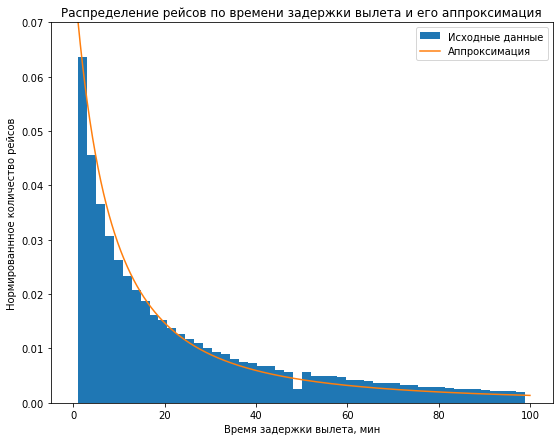

In [49]:
plt.figure(figsize=(9, 7))

plt.hist(positive_dep_delay,density=True,bins=50,label='Исходные данные')
plt.plot(xs,approximate,label='Аппроксимация')

plt.ylim([0,0.07])
plt.xlabel("Время задержки вылета, мин")
plt.ylabel("Нормированнное количество рейсов")
plt.title("Распределение рейсов по времени задержки вылета и его аппроксимация")
plt.legend()

Я попыталась вручную подобрать параметры этого распределения так, чтобы оно приблизительно по форме совпадало с нормированной гистограммой. Получились значения А = 18, B = 15, C = 2.

### 8. Линейная регрессия для положительных времен задержки вылета

Вновь рассмотрим те рейсы, для которых задержка вылета положительна, и рассмотрим статистику задержек вылета в зависимости от месяца.

Построим в одних осях графики числа рейсов в месяц и среднего времени задержки в месяц:

In [50]:
x = data['month'].unique()

In [51]:
count_month = []
mean_month = []

for i in x:
    count = data[dep_delay & (data['dep_delay']>0) & (data['month']==i)]['dep_delay'].count()
    mean = data[dep_delay & (data['dep_delay']>0) & (data['month']==i)]['dep_delay'].mean()
    count_month.append(count)
    mean_month.append(mean)

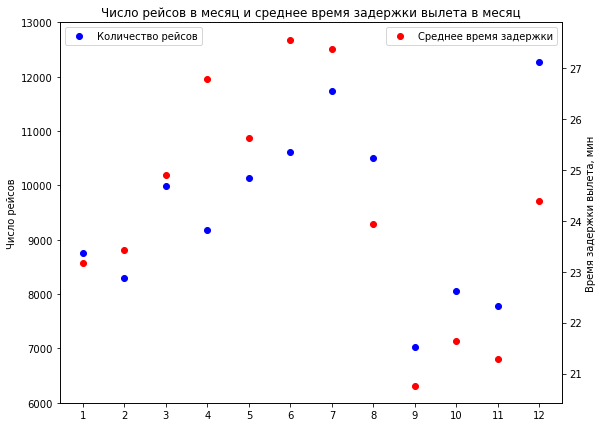

In [52]:
fig, ax = plt.subplots(figsize=(9, 7))
ax1 = ax.twinx()
ax.plot(x,count_month,marker='o',color='blue',linestyle='none',label='Количество рейсов')
ax1.plot(x,mean_month,marker='o',color='red',linestyle='none',label='Среднее время задержки')

ax.set_ylabel('Число рейсов')
ax1.set_ylabel('Время задержки вылета, мин')
ax.set_ylim([6000,13000])

plt.xlabel("Номер месяца")
plt.xticks(x)
plt.title("Число рейсов в месяц и среднее время задержки вылета в месяц")
ax.legend(loc='upper left')
ax1.legend(loc='upper right')

Проверим, есть ли линейная взаимосвязь между числом рейсов в месяц и средним временем задержки вылета в месяц. Применим метод `linregress` из модуля `scipy.stats` для оценки взаимосвязи и найдем коэффициент корреляции:

In [53]:
regression = stats.linregress(count_month,mean_month)
print('Значение коэффициента Пирсона:',regression.rvalue)
print('А (slope):',regression.slope)
print('B (intercept):',regression.intercept)

Значение коэффициента Пирсона: 0.7362458189529977
А (slope): 0.0010557293442535504
B (intercept): 14.175221570583927


In [54]:
regression

LinregressResult(slope=0.0010557293442535504, intercept=14.175221570583927, rvalue=0.7362458189529977, pvalue=0.006326444138401353, stderr=0.00030685629314680587, intercept_stderr=2.961952734021946)

Судя по параметрам линейной регрессии, есть слабая линейная зависимость между параметрами. Однако p-value << 0.05, поэтому по-хорошему бы сказать, что линейная зависимость отсутствует.

Уравнение регрессии:<br>
$$ y=Ax+B $$ 
$ A = 0.00106,  B = 14.17522  $

Построим точечную диаграмму, показывающую зависимость между средним значением времени вылета в месяц и числом рейсов в месяц, и нанесем на нее линию регрессии с полученными параметрами: 

In [55]:
y=[]
for i in count_month:
    y_pred=regression.slope*i+regression.intercept
    y.append(y_pred)

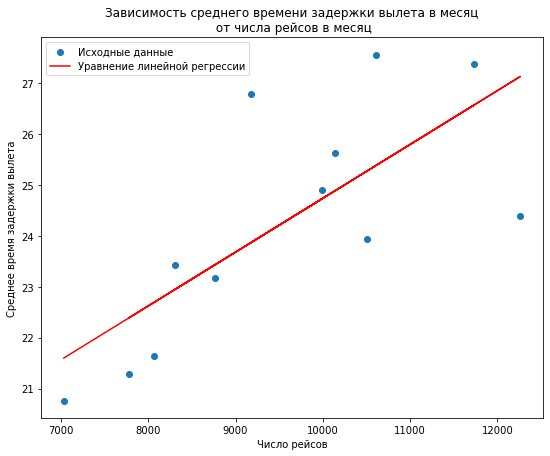

In [56]:
plt.figure(figsize=(9, 7))

plt.scatter(count_month,mean_month,label='Исходные данные')
plt.plot(count_month,y,color = 'r',ls='-',label='Уравнение линейной регрессии')

plt.xlabel("Число рейсов")
plt.ylabel("Среднее время задержки вылета")
plt.title("Зависимость среднего времени задержки вылета в месяц\n от числа рейсов в месяц")
plt.legend()

### 9. Зависимость среднего времени задержки от часа вылета

Рассмотрим среднее время задержки в зависимости от часа вылета:

In [57]:
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [58]:
mean_hour = []

for i in hours:
    mean_hour.append(data[dep_delay&(data['dep_time']>=i*100)
                     &(data['dep_time']<(i+1)*100)]['dep_delay'].mean())


In [59]:
mean_hour[0]=data[dep_delay&((data['dep_time']>=0)&(data['dep_time']<100)
                             |(data['dep_time']==2400))]['dep_delay'].mean()

In [60]:
mean_hour

[34.932853717026376,
 78.97297297297297,
 nan,
 nan,
 -5.554098360655738,
 -4.353990870106515,
 -1.8421541318477253,
 -0.21314927468413664,
 0.27299431579750505,
 2.5720970257623836,
 2.7585921588594706,
 2.306780696395846,
 3.972993679371768,
 5.488686131386861,
 4.980385288966725,
 7.21590806669671,
 9.556131420638593,
 10.723096615151228,
 10.402471576866041,
 11.56961752171333,
 14.558421124640853,
 20.038353196099674,
 29.73718757889422,
 28.411969380654142]

Рассмотрим долю рейсов, для которых задержка >0, в зависимости от часа вылета. Для этого подсчитаем для каждого часа число рейсов с задержкой >0, общее число рейсов и долю рейсов с задержкой вылета >0.

In [61]:
count_hour_pos = []

for i in hours:
    count_hour_pos.append(data[dep_delay&(data['dep_delay']>0)&(data['dep_time']>=i*100)
                           &(data['dep_time']<(i+1)*100)]['dep_delay'].count())

In [62]:
count_hour_pos[0]=count_hour_pos[0]+data[dep_delay & (data['dep_delay']>0)&(data['dep_time']==2400)]['dep_delay'].count()

In [63]:
count_hour_pos

[417,
 37,
 0,
 0,
 0,
 366,
 4104,
 4406,
 6019,
 5268,
 4674,
 4454,
 5280,
 6634,
 7110,
 9967,
 9963,
 10542,
 9122,
 9217,
 7560,
 5730,
 2598,
 867]

In [64]:
count_hour_all = []

for i in hours:
    count_hour_all.append(data[dep_delay&(data['dep_time']>=i*100)
                          &(data['dep_time']<(i+1)*100)]['dep_delay'].count())

In [65]:
count_hour_all[0]=count_hour_all[0]+data[dep_delay&(data['dep_time']==2400)]['dep_delay'].count()

In [66]:
count_hour_all

[417,
 37,
 0,
 0,
 305,
 7229,
 22617,
 21370,
 26213,
 18593,
 15712,
 16370,
 15663,
 16440,
 19985,
 22190,
 21610,
 21094,
 20230,
 18537,
 14618,
 9230,
 3961,
 1437]

In [67]:
share_hour_pos=[]

for i in range(0,len(count_hour_all)):
    share = count_hour_pos[i]/count_hour_all[i]
    share_hour_pos.append(share)

C:\Users\khmel\AppData\Local\Temp\ipykernel_13628\3941962477.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  share = count_hour_pos[i]/count_hour_all[i]


In [68]:
share_hour_pos

[1.0,
 1.0,
 nan,
 nan,
 0.0,
 0.05062940932355789,
 0.18145642658177477,
 0.20617688348151614,
 0.22961889138976843,
 0.2833324369386328,
 0.297479633401222,
 0.27208307880268784,
 0.33710017238076995,
 0.40352798053527983,
 0.3557668251188391,
 0.4491662911221271,
 0.46103655714946784,
 0.49976296577225754,
 0.450914483440435,
 0.4972217726708745,
 0.5171706115747708,
 0.6208017334777898,
 0.6558949760161575,
 0.6033402922755741]

Отобразим полученные данные на графиках:

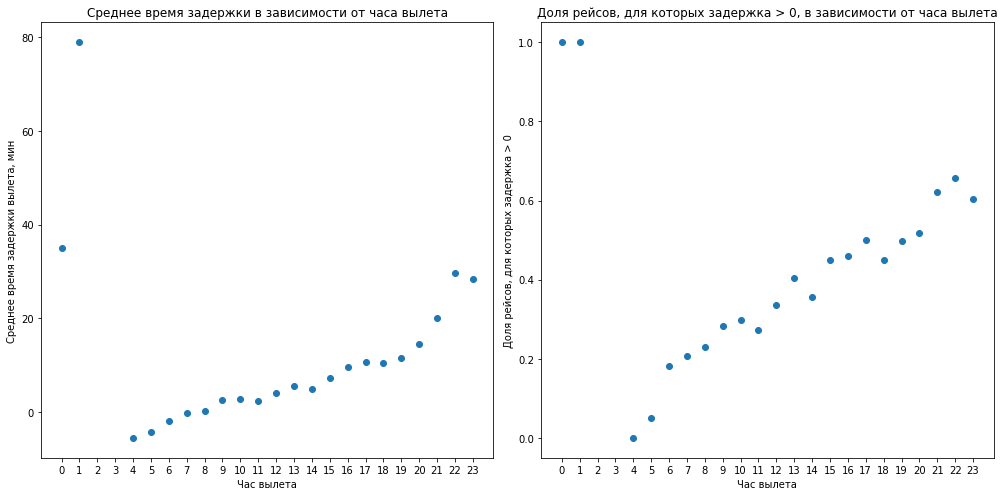

In [69]:
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
plt.plot(hours,mean_hour,marker='o',linestyle='none')
plt.xticks(hours)
plt.xlabel('Час вылета')
plt.ylabel('Среднее время задержки вылета, мин')
plt.title('Cреднее время задержки в зависимости от часа вылета')

plt.subplot(1,2,2)
plt.plot(hours,share_hour_pos,marker='o',linestyle='none')
plt.xticks(hours)
plt.xlabel('Час вылета')
plt.ylabel('Доля рейсов, для которых задержка > 0')
plt.title('Доля рейсов, для которых задержка > 0, в зависимости от часа вылета')

plt.tight_layout()

Таким образом, по графикам можно сделать несколько выводов:
* для часов 00 и 01 наблюдается, что задержка вылета всех рейсов в эти часы положительна и, соответственно, средние времена задержек в эти часы самые большие;
* для часов 02 и 03 рейсов не наблюдается;
* после 4 часа наблюдаются приблизительно линейные возрастающие зависимости среднего времени задержки и доли рейсов, для которых задержка >0, от часа вылета;
* чем больше доля рейсов с положительной задержкой времени вылета, тем больше среднее время задержки.

### 10. Разделение авиакомпаний на пунктуальные и непунктуальные

Попробуем разделить все авиакомпании на пункутальные и непунктуальные.

Пусть рейс вылетает "вовремя", если модуль задержки времени вылета < 10 мин. Для каждой авиакомпании посмотрим долю рейсов, которые вылетают "вовремя".

In [70]:
data['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [71]:
ontime = []

for x in data['carrier'].unique():
    flihgt_ontime = data[dep_delay&(data['carrier']==x)&(np.abs(data['dep_delay'])<=10)]['dep_delay'].count()
    flight_all = data[dep_delay&(data['carrier']==x)]['dep_delay'].count()
    share_ontime = flihgt_ontime/flight_all
    ontime.append(share_ontime)

In [72]:
ontime

[0.7599026729165921,
 0.8173148417547603,
 0.7421263267791891,
 0.8207008436080467,
 0.6872272574689493,
 0.7359787921464668,
 0.8405559259449202,
 0.7120921305182342,
 0.8123593206466134,
 0.6789420823568798,
 0.7682215743440233,
 0.7216577375454154,
 0.675,
 0.8982035928143712,
 0.6418786692759295,
 0.6666666666666666]

Будем считать, что авиакомпания является пунктуальной, если больше 75% рейсов прилетают "вовремя".

In [73]:
punctuality = []

for x in ontime:
    if x>=0.75:
        punctuality.append('punctual')
    else:
        punctuality.append('unpunctual')

Посмотрим, какие из авиакомпаний являются пунктуальными:

In [74]:
df = pd.DataFrame({'carrier':data['carrier'].unique(),'share on time':ontime,'punctuality':punctuality})

In [75]:
df

,carrier,share on time,punctuality
0,UA,0.759903,punctual
1,AA,0.817315,punctual
2,B6,0.742126,unpunctual
3,DL,0.820701,punctual
4,EV,0.687227,unpunctual
5,MQ,0.735979,unpunctual
6,US,0.840556,punctual
7,WN,0.712092,unpunctual
8,VX,0.812359,punctual
9,FL,0.678942,unpunctual


Посмотрим, есть ли связь между пунктуальнотью авиакомпании и дальностью перелета. Для этого посчитаем среднее расстояние перелета для каждой авиакомпании.

In [76]:
mean_distance = []

for x in data['carrier'].unique():
    distance = data[dep_delay&(data['carrier']==x)]['distance'].mean()
    mean_distance.append(distance)

In [77]:
mean_distance

[1533.301266683365,
 1340.7431222319206,
 1073.1726117974595,
 1241.8167856370321,
 562.3380328969453,
 570.9272636898352,
 559.0078978409149,
 998.3182690629908,
 2497.70349907919,
 666.6116504854369,
 2402.0,
 529.9597881642958,
 1620.0,
 4983.0,
 374.24657534246575,
 513.4074074074074]

In [78]:
df['mean distance']=mean_distance

In [79]:
df

,carrier,share on time,punctuality,mean distance
0,UA,0.759903,punctual,1533.301267
1,AA,0.817315,punctual,1340.743122
2,B6,0.742126,unpunctual,1073.172612
3,DL,0.820701,punctual,1241.816786
4,EV,0.687227,unpunctual,562.338033
5,MQ,0.735979,unpunctual,570.927264
6,US,0.840556,punctual,559.007898
7,WN,0.712092,unpunctual,998.318269
8,VX,0.812359,punctual,2497.703499
9,FL,0.678942,unpunctual,666.611650


Я бы сказала, что в основном пунктуальными являются авиакомпании, летающие на дальние дистанции (с большим значением среднего расстояния перелета, >1200 км). Исключение составляют авиакомпании US и F9.